# 1
# Table of Content
1.[Inital Fase](#1)
   * [Description](#Description)
   * [Purpose](#Purpose)
   * [Preparation](#Preparation)
   
2.[Discovery](#2.0)
   * [Outlook](#Outlook)
   
3.[Data Esploration](#3)
   * [Columns](#Columns)
   * [Check data](#3.2)

## 1.1
# Description

[Link to data](https://github.com/washingtonpost/data-police-shootings)

### About the data
The file fatal-police-shootings-data.csv contains data about each fatal shooting in CSV format. The file can be downloaded at this URL. Each row has the following variables:

- `id`: a unique identifier for each victim

- `name`: the name of the victim

- `date`: the date of the fatal shooting in YYYY-MM-DD format

- `manner_of_death`:

    - shot
    - shot and Tasered

- `armed`: indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm

    - undetermined: it is not known whether or not the victim had a weapon
    - unknown: the victim was armed, but it is not known what the object was
    - unarmed: the victim was not armed

- `age`: the age of the victim

- `gender`: the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.

    - M: Male
    - F: Female
    - None: unknown

- `race`:

    - W: White, non-Hispanic
    - B: Black, non-Hispanic
    - A: Asian
    - N: Native American
    - H: Hispanic
    - O: Other
    - None: unknown

- `city`: the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.

- `state`: two-letter postal code abbreviation

- `signs of mental illness`: News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

- `threat_level`: The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

- `flee`: News reports have indicated the victim was moving away from officers

Foot
Car
Not fleeing
The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.

- `body_camera`: News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

- `latitude and longitude`: the location of the shooting expressed as WGS84 coordinates, geocoded from addresses. The coordinates are rounded to 3 decimal places, meaning they have a precision of about 80-100 meters within the contiguous U.S.

- `is_geocoding_exact`: reflects the accuracy of the coordinates. true means that the coordinates are for the location of the shooting (within approximately 100 meters), while false means that coordinates are for the centroid of a larger region, such as the city or county where the shooting happened.

### Contributing
We welcome assistance in making the our data as complete and accurate as possible. The best way to contribute to the data, make suggestions or provide information about fatal police shootings since Jan. 1, 2015, is to send us an email at policeshootingsfeedback@washpost.com. Please note that we do not accept pull requests as the data file is generated downstream of our internal database.

### Licensing
The data is published under an Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) license.

### Contact
Contact policeshootingsfeedback@washpost.com with any questions about the data, feedback, updated information or corrections.

### Credits
Research and reporting: Julie Tate, Jennifer Jenkins and Steven Rich

Database development: John Muyskens

## 1.2
# Purpose

Analise police victimns in USA

## 1.3
# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium
import json

# General settings
sns.set_theme(style="whitegrid")

#customplot
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams["figure.figsize"] = 10, 6

# Set palette for the project
pal = ['#D7421D','#F4A261','#E9C46A','#2A9D8F','#264653']
sns.set_palette(pal)

pal_1 = ['#ef476f','#ffd166','#06d6a0','#118ab2','#073b4c']
sns.set_palette(pal_1)

# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

In [2]:
#color palette
sns.color_palette(pal)

[(0.8431372549019608, 0.25882352941176473, 0.11372549019607843),
 (0.9568627450980393, 0.6352941176470588, 0.3803921568627451),
 (0.9137254901960784, 0.7686274509803922, 0.41568627450980394),
 (0.16470588235294117, 0.615686274509804, 0.5607843137254902),
 (0.14901960784313725, 0.27450980392156865, 0.3254901960784314)]

In [3]:
#color palette
sns.color_palette(pal_1)

[(0.9372549019607843, 0.2784313725490196, 0.43529411764705883),
 (1.0, 0.8196078431372549, 0.4),
 (0.023529411764705882, 0.8392156862745098, 0.6274509803921569),
 (0.06666666666666667, 0.5411764705882353, 0.6980392156862745),
 (0.027450980392156862, 0.23137254901960785, 0.2980392156862745)]

## 2.0
# Discovery Social Dataset

In [4]:
raw_P = pd.read_csv('./Data/PopulationByCity.csv')
with open('./Data/PercentagePeopleBelowPovertyLevel.csv', encoding="utf8", errors='ignore') as f:
    raw_PL = pd.read_csv(f)
with open('./Data/MedianHouseholdIncome2015.csv', encoding="utf8", errors='ignore') as f:
    raw_HI = pd.read_csv(f)
with open('./Data/PercentOver25CompletedHighSchool.csv', encoding="utf8", errors='ignore') as f:
    raw_HS = pd.read_csv(f)
with open('./Data/ShareRaceByCity.csv', encoding="utf8", errors='ignore') as f:
    raw_R = pd.read_csv(f)

## 2.1
# Outlook
the following dataset rappresent the popolation for each city

In [5]:
raw_P.sample()

city state  population      lat      lng
1073  Memphis    IN       941.0  38.4892 -85.7679

In [6]:
# Visualizing Missing values
data_info= pd.DataFrame({'Attributes':raw_P.columns})
data_info['Type']= data_info['Attributes'].apply(lambda x: raw_P[x].dtypes)
data_info['Count_NA']= data_info['Attributes'].apply(lambda x: raw_P[x].isna().sum())
data_info['Percentage_NA']= data_info['Attributes'].apply(lambda x: raw_P[x].isna().mean())
data_info

Attributes     Type  Count_NA  Percentage_NA
0        city   object         0       0.000000
1       state   object         0       0.000000
2  population  float64         0       0.000000
3         lat  float64       604       0.213277
4         lng  float64       604       0.213277

We will use only `popolation` columns so we have no missing value

In [7]:
df_P = raw_P.groupby('state')['population'].mean().sort_values(ascending=False)
df_P.head(5)

state
DC    5.289420e+06
NY    5.171680e+05
RI    4.314350e+05
MA    2.304610e+05
IL    1.862916e+05
Name: population, dtype: float64

Text(0, 0.5, 'Popolazione medio(%)')

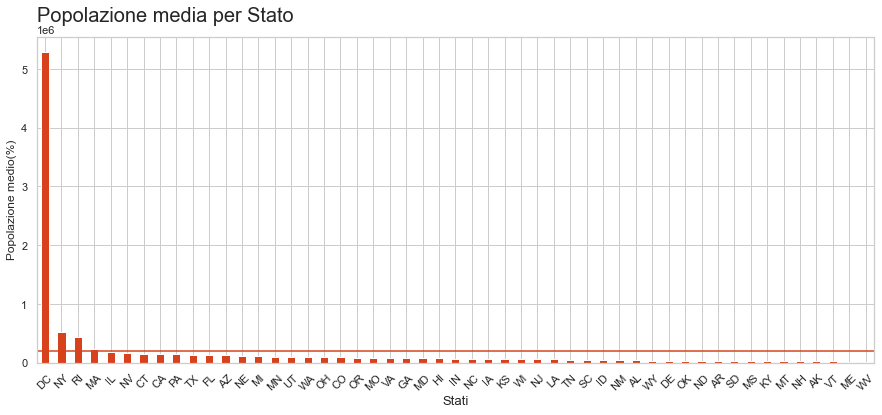

In [8]:
plt.figure(figsize=(15,6))
df_P.plot(kind='bar', color=pal[0])

#calcolo la mean
mean = np.mean(df_P)
#Inserisco la mean nel grafico
plt.axhline(mean, c=pal[0])

plt.xticks(rotation=45)
plt.title('Popolazione media per Stato', loc='left', pad=15, fontsize=20)
plt.xlabel('Stati', fontsize=13)
plt.ylabel('Popolazione medio(%)')

In [1]:
raw_P.groupby('state')['population'].mean()

NameError: name 'raw_P' is not defined

In [10]:
raw_P.loc[raw_P['state']=='DC']

city state  population      lat      lng
629  Washington    DC   5289420.0  38.9047 -77.0163

This dataset contains wrong data, so i decided to not use it.
I replace this information with another dataset.

## 2.2
# Outlook
This dataset provides poverty rate for each city

In [13]:
raw_PL.sample()

Geographic Area                    City poverty_rate
22581              PA  New Cumberland borough          7.6

In [14]:
# Visualizing Missing values
data_info= pd.DataFrame({'Attributes':raw_PL.columns})
data_info['Type']= data_info['Attributes'].apply(lambda x: raw_PL[x].dtypes)
data_info['Count_NA']= data_info['Attributes'].apply(lambda x: raw_PL[x].isna().sum())
data_info['Percentage_NA']= data_info['Attributes'].apply(lambda x: raw_PL[x].isna().mean())
data_info

Attributes    Type  Count_NA  Percentage_NA
0  Geographic Area  object         0            0.0
1             City  object         0            0.0
2     poverty_rate  object         0            0.0

I dati mancanti non rappresentano un problema visto che dobbiamo estrapolare solamente la colonna `popolation`

In [15]:
#Sostituisco il valore
raw_PL.poverty_rate.replace(['-'], 0.0, inplace=True)

# converto la colonna
raw_PL.poverty_rate = raw_PL.poverty_rate.astype('float')

df_PL = raw_PL.groupby('Geographic Area')['poverty_rate'].mean().round(0)

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_PL,
    columns=["Geographic Area"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="poverty_rate",
).add_to(m)

folium.LayerControl().add_to(m)

m.save("poverty_rate.html")

m

In [16]:
df_PL = raw_PL.groupby('Geographic Area')['poverty_rate'].mean().round(0).sort_values(ascending=False)
df_PL.head(5)

Geographic Area
MS    27.0
AZ    25.0
GA    24.0
AR    23.0
NM    23.0
Name: poverty_rate, dtype: float64

Text(0, 0.5, 'Tasso di Povertà medio(%)')

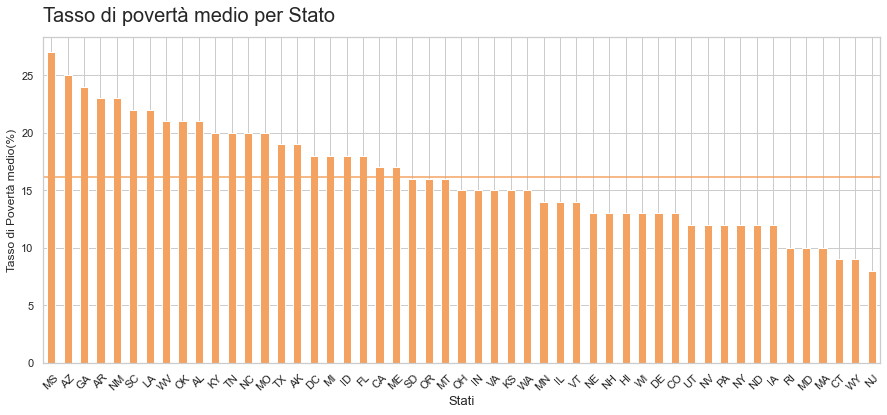

In [17]:
plt.figure(figsize=(15,6))
df_PL.plot(kind='bar', color=pal[1])

#calcolo la mean
mean = np.mean(df_PL)
#Inserisco la mean nel grafico
plt.axhline(mean, c=pal[1])

plt.xticks(rotation=45)
plt.title('Tasso di povertà medio per Stato', loc='left', pad=15, fontsize=20)
plt.xlabel('Stati', fontsize=13)
plt.ylabel('Tasso di Povertà medio(%)')


Text(0, 0.5, 'Densità')

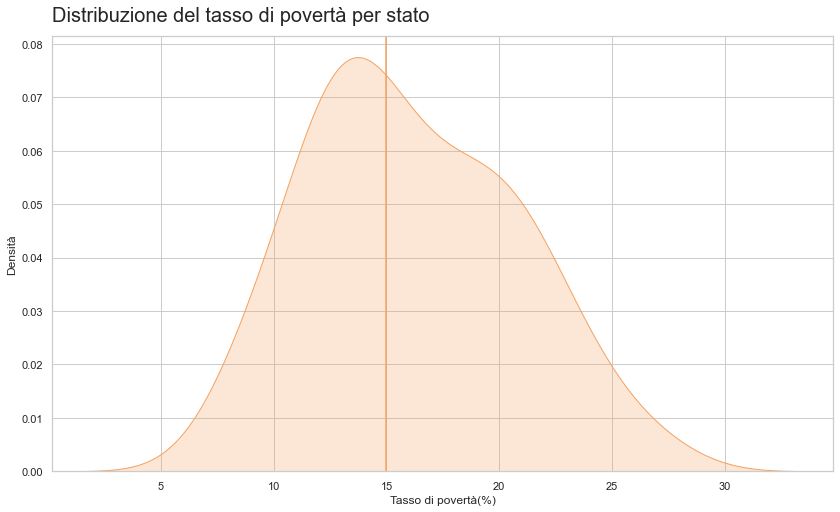

In [18]:
plt.figure(figsize=(14,8)) 
sns.kdeplot(df_PL, shade=True, color=pal[1])
#calcolo la mediana
median = np.median(df_PL)
#Inserisco la mediana nel grafico
plt.axvline(median, c=pal[1])

plt.title('Distribuzione del tasso di povertà per stato', loc='left', pad=15, fontsize=20)
plt.xlabel('Tasso di povertà(%)')
plt.ylabel('Densità')

# plt.savefig("./Img/Distribution PovertyRate.png")

## 2.3
# Outlook

In [19]:
raw_HI.sample()

Geographic Area       City Median Income
21464              OR  Trail CDP           (X)

In [20]:
# Bar Chart Visualizing Missing values
data_info= pd.DataFrame({'Attributes':raw_HI.columns})
data_info['Type']= data_info['Attributes'].apply(lambda x: raw_HI[x].dtypes)
data_info['Count_NA']= data_info['Attributes'].apply(lambda x: raw_HI[x].isna().sum())
data_info['Percentage_NA']= data_info['Attributes'].apply(lambda x: raw_HI[x].isna().mean())
data_info

Attributes    Type  Count_NA  Percentage_NA
0  Geographic Area  object         0       0.000000
1             City  object         0       0.000000
2    Median Income  object        51       0.001739

I dati mancanti non rappresentano un problema visto che dobbiamo estrapolare solamente la colonna `popolation`

In [21]:
# Sostituisco i valori '-' e '(X)' con 0 
raw_HI['Median Income'].replace(['-','(X)','2,500-', '250,000+'], 0.0, inplace=True)

# Converto la colonna
raw_HI['Median Income'] = raw_HI['Median Income'].astype('float')

df_HI = raw_HI.groupby('Geographic Area')['Median Income'].mean().round(0)

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_HI,
    columns=["Geographic Area"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Median Income",
).add_to(m)

folium.LayerControl().add_to(m)

m.save("Median_Income.html")

m

In [22]:
df_HI = raw_HI.groupby('Geographic Area')['Median Income'].mean().round(0).sort_values(ascending=False)
df_HI.tail(5)

Geographic Area
AZ    35052.0
WV    34560.0
AR    33949.0
MS    33165.0
NM    29305.0
Name: Median Income, dtype: float64

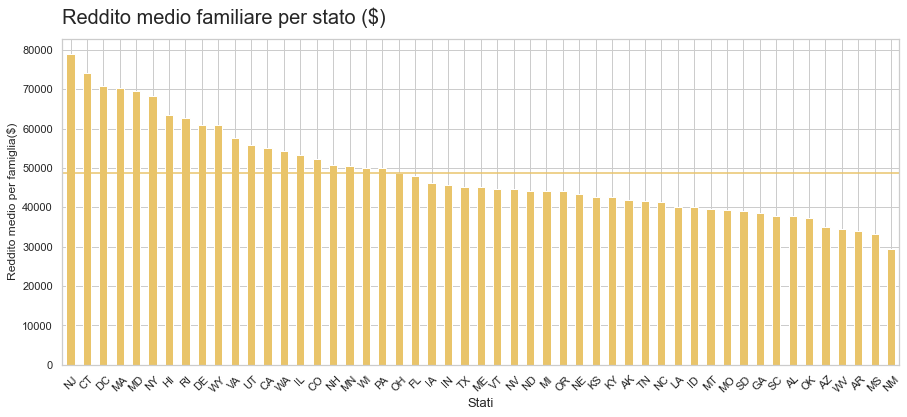

In [23]:
plt.figure(figsize=(15,6))
df_HI.plot(kind='bar', color=pal[2])

#calcolo la mean
mean = np.mean(df_HI)
#Inserisco la mean nel grafico
plt.axhline(mean, c=pal[2])

plt.xticks(rotation=45)
plt.title('Reddito medio familiare per stato ($)', loc='left', pad=15, fontsize=20)
plt.xlabel('Stati', fontsize=13)
plt.ylabel('Reddito medio per famiglia($)');

Text(0, 0.5, 'Densità')

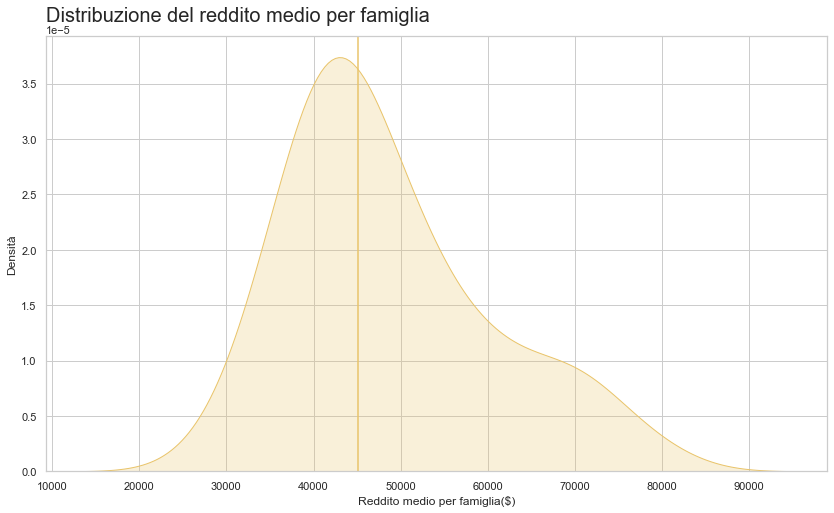

In [24]:
plt.figure(figsize=(14,8)) 
sns.kdeplot(df_HI, shade=True, color=pal[2])
#calcolo la mediana
median = np.median(df_HI)
#Inserisco la mediana nel grafico
plt.axvline(median, c=pal[2])

plt.title('Distribuzione del reddito medio per famiglia', loc='left', pad=15, fontsize=20)
plt.xlabel('Reddito medio per famiglia($)')
plt.ylabel('Densità')

# plt.savefig("./Img/Distribution MedianIncome.png")

## 2.4
# Outlook

In [25]:
raw_HS.sample()

Geographic Area       City percent_completed_hs
645              AK  Cohoe CDP                   95

In [26]:
# Bar Chart Visualizing Missing values
data_info= pd.DataFrame({'Attributes':raw_HS.columns})
data_info['Type']= data_info['Attributes'].apply(lambda x: raw_HS[x].dtypes)
data_info['Count_NA']= data_info['Attributes'].apply(lambda x: raw_HS[x].isna().sum())
data_info['Percentage_NA']= data_info['Attributes'].apply(lambda x: raw_HS[x].isna().mean())
data_info

Attributes    Type  Count_NA  Percentage_NA
0       Geographic Area  object         0            0.0
1                  City  object         0            0.0
2  percent_completed_hs  object         0            0.0

I dati mancanti non rappresentano un problema visto che dobbiamo estrapolare solamente la colonna `popolation`

In [27]:
# Sostituisco i valori '-' e '(X)' con 0 
raw_HS['percent_completed_hs'].replace(['-','(X)'], 0.0, inplace=True)

# Converto la colonna
raw_HS['percent_completed_hs'] = raw_HS['percent_completed_hs'].astype('float')

df_HS_map = raw_HS.groupby('Geographic Area')['percent_completed_hs'].mean().round(0)
print(df_HS_map)

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df_HS_map,
    columns=["Geographic Area"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Percent Completed HS",
).add_to(m)

folium.LayerControl().add_to(m)

m.save("Completed_HS.html")

m

Geographic Area
AK    80.0
AL    80.0
AR    80.0
AZ    79.0
CA    81.0
CO    89.0
CT    92.0
DC    89.0
DE    89.0
FL    85.0
GA    79.0
HI    92.0
IA    90.0
ID    84.0
IL    88.0
IN    86.0
KS    88.0
KY    82.0
LA    79.0
MA    92.0
MD    88.0
ME    91.0
MI    89.0
MN    89.0
MO    83.0
MS    78.0
MT    90.0
NC    83.0
ND    88.0
NE    90.0
NH    91.0
NJ    91.0
NM    79.0
NV    87.0
NY    91.0
OH    88.0
OK    82.0
OR    88.0
PA    89.0
RI    89.0
SC    81.0
SD    86.0
TN    82.0
TX    74.0
UT    90.0
VA    85.0
VT    90.0
WA    87.0
WI    90.0
WV    82.0
WY    84.0
Name: percent_completed_hs, dtype: float64


In [28]:
df_HS = raw_HS.groupby('Geographic Area')['percent_completed_hs'].mean().round(0).sort_values(ascending=False)
df_HS.head(5)

Geographic Area
HI    92.0
CT    92.0
MA    92.0
ME    91.0
NH    91.0
Name: percent_completed_hs, dtype: float64

Text(0, 0.5, 'Diplomati High School(%)')

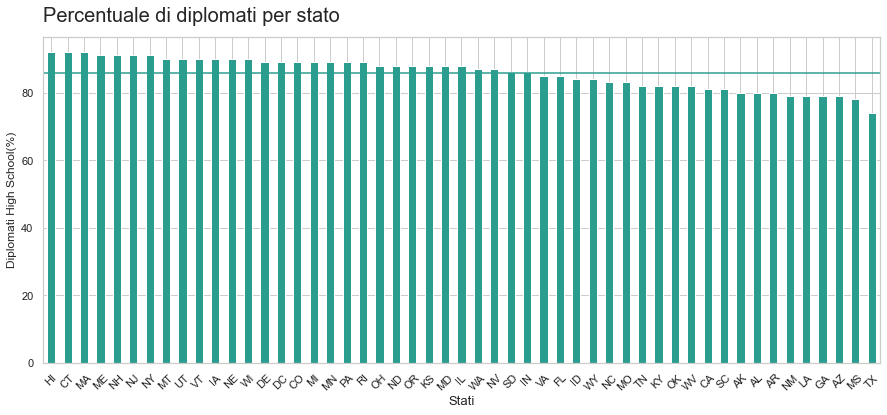

In [29]:
plt.figure(figsize=(15,6))
df_HS.plot(kind='bar', color=pal[3])

#calcolo la mean
mean = np.mean(df_HS)
#Inserisco la mean nel grafico
plt.axhline(mean, c=pal[3])

plt.xticks(rotation=45)
plt.title('Percentuale di diplomati per stato', loc='left', pad=15, fontsize=20)
plt.xlabel('Stati', fontsize=13)
plt.ylabel('Diplomati High School(%)')



Text(0, 0.5, 'Densità')

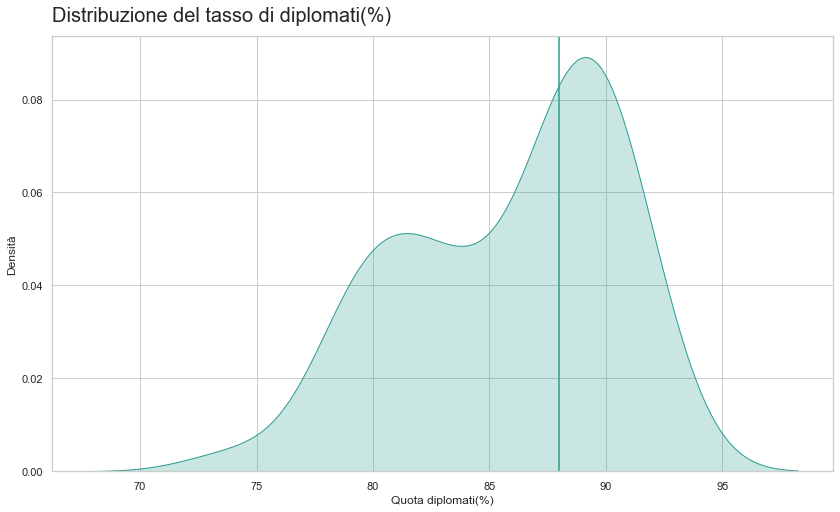

In [30]:
plt.figure(figsize=(14,8)) 
sns.kdeplot(df_HS, shade=True, color=pal[3])
#calcolo la mediana
median = np.median(df_HS)
#Inserisco la mediana nel grafico
plt.axvline(median, c=pal[3])

plt.title('Distribuzione del tasso di diplomati(%)', loc='left', pad=15, fontsize=20)
plt.xlabel('Quota diplomati(%)')
plt.ylabel('Densità')

# plt.savefig("./Img/Distribution CompleteHsRate.png")

## 2.5
# Outlook

In [31]:
raw_R.sample()

Geographic area                      City share_white share_black  \
5886              ID  Fernan Lake Village city        96.4         0.6   

     share_native_american share_asian share_hispanic  
5886                   1.2         1.8            4.7

In [32]:
#Rimuovo i valori non numerici
raw_R.replace(['-','(X)'],0.0,inplace=True)

In [33]:
#Converto le colonne
raw_R["share_white"] = raw_R['share_white'].astype('float')
raw_R["share_black"] = raw_R['share_black'].astype('float')
raw_R["share_native_american"] = raw_R['share_native_american'].astype('float')
raw_R["share_asian"] = raw_R['share_asian'].astype('float')
raw_R["share_hispanic"] = raw_R['share_hispanic'].astype('float')

In [34]:
#Agrego i dati
raw_R = raw_R[[x for x in raw_R.columns if 'share' in x] + ['Geographic area']].groupby('Geographic area').mean()

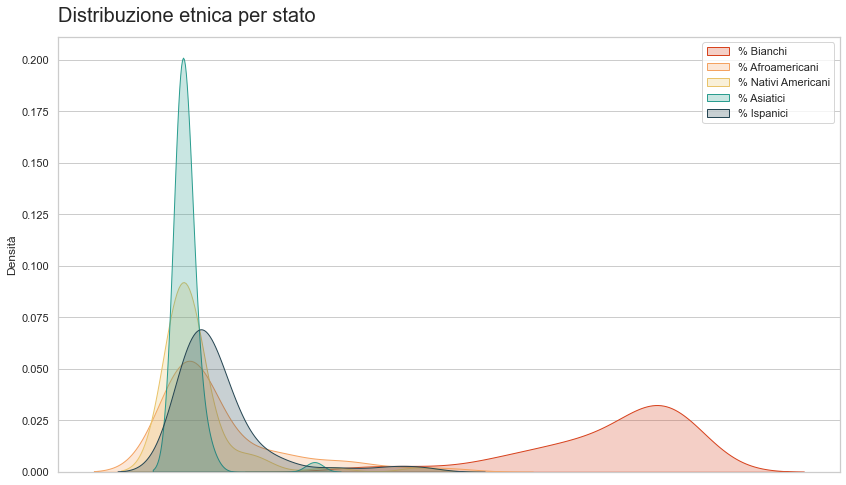

In [35]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.xaxis.set_ticks([])

sns.kdeplot(raw_R.share_white, ax=ax, shade=True, color=pal[0])
sns.kdeplot(raw_R.share_black, ax=ax, shade=True, color=pal[1])
sns.kdeplot(raw_R.share_native_american, ax=ax, shade=True, color=pal[2])
sns.kdeplot(raw_R.share_asian, shade=True, color=pal[3])
sns.kdeplot(raw_R.share_hispanic, ax=ax, shade=True, color=pal[4])

ax.set_title("Distribuzione etnica per stato", loc='left', fontsize=20, pad=15)
ax.set_xlabel(' ')
ax.set_ylabel('Densità') 
plt.legend(['% Bianchi', '% Afroamericani','% Nativi Americani', '% Asiatici', '% Ispanici']);

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5]),
 <a list of 51 Text major ticklabel objects>)

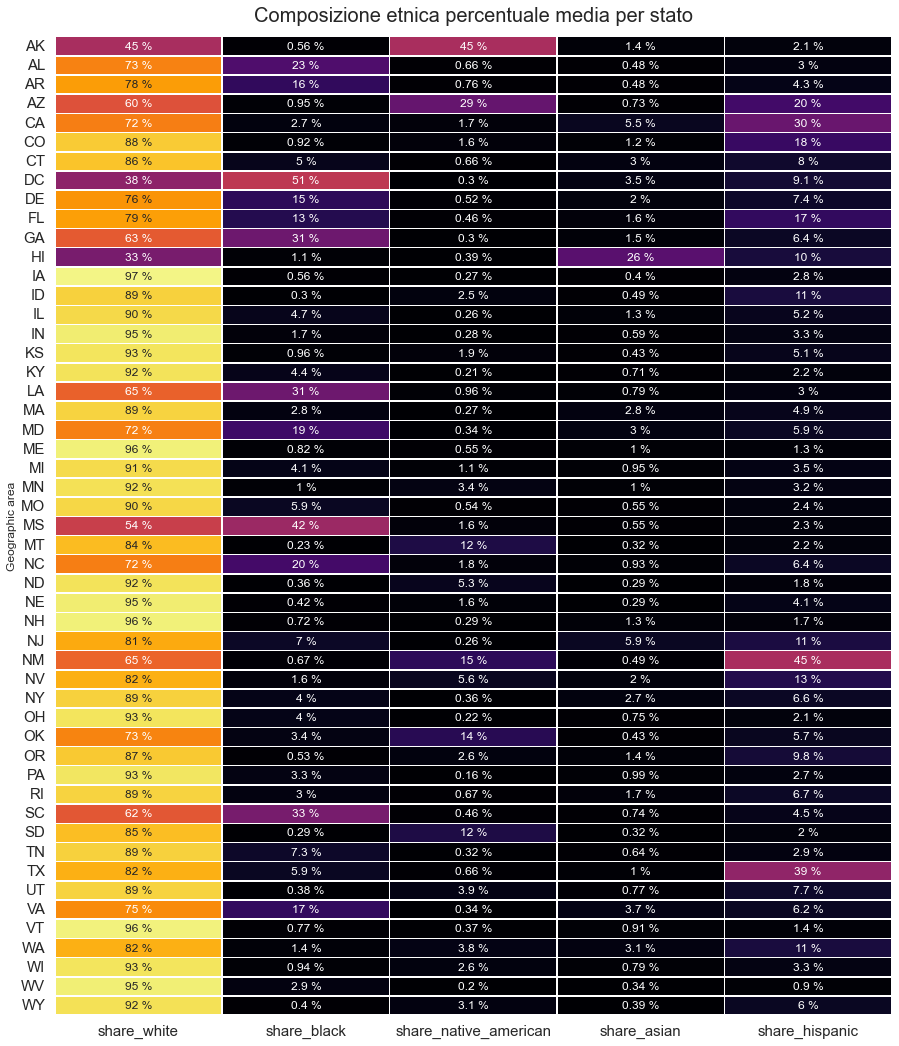

In [36]:
plt.figure(figsize=(15,18))
et = sns.heatmap(raw_R, vmin=0, vmax=100, cmap='inferno',
                 annot=True, cbar=None, linewidths=.5,
                annot_kws={"size":12})
for t in et.texts: t.set_text(t.get_text() + " %")
plt.title('Composizione etnica percentuale media per stato', fontsize=20, pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)

In [37]:
raw_R['share_black']

Geographic area
AK     0.562535
AL    23.322318
AR    16.296858
AZ     0.954545
CA     2.679645
CO     0.917686
CT     4.992308
DC    50.700000
DE    15.393421
FL    13.370870
GA    30.633546
HI     1.070861
IA     0.563528
ID     0.295154
IL     4.704316
IN     1.688270
KS     0.960507
KY     4.421143
LA    30.775476
MA     2.790574
MD    19.463900
ME     0.819847
MI     4.124277
MN     1.000773
MO     5.862306
MS    41.833978
MT     0.226575
NC    20.402300
ND     0.357357
NE     0.420517
NH     0.715625
NJ     6.975046
NM     0.667043
NV     1.567442
NY     4.007738
OH     3.959967
OK     3.376262
OR     0.528117
PA     3.270238
RI     2.988235
SC    32.834430
SD     0.290000
TN     7.302797
TX     5.866324
UT     0.384969
VA    16.510829
VT     0.770588
WA     1.426592
WI     0.937257
WV     2.915212
WY     0.397537
Name: share_black, dtype: float64

In [38]:
# url = (
#     "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
# )
# state_geo = f"{url}/us-states.json"

# m = folium.Map(location=[48, -102], zoom_start=4)

# folium.Choropleth(
#     geo_data=state_geo,
#     name="choropleth",
#     data=raw_R,
#     columns=["share_white"],
#     key_on="feature.id",
#     fill_color="YlGn",
#     fill_opacity=1,
#     line_opacity=0.2,
#     legend_name="Black",
# ).add_to(m)

# folium.LayerControl().add_to(m)

# m.save("Black.html")

# m

In [39]:
raw_R

share_white  share_black  share_native_american  share_asian  \
Geographic area                                                                 
AK                 45.264225     0.562535              45.477183     1.376620   
AL                 72.507266    23.322318               0.659343     0.479758   
AR                 78.449538    16.296858               0.759889     0.477079   
AZ                 59.929047     0.954545              28.589800     0.726608   
CA                 71.535982     2.679645               1.715167     5.542613   
CO                 87.768341     0.917686               1.624891     1.154803   
CT                 86.105594     4.992308               0.656643     2.989510   
DC                 38.500000    50.700000               0.300000     3.500000   
DE                 76.246053    15.393421               0.523684     2.000000   
FL                 78.672500    13.370870               0.455435     1.616739   
GA                 62.591534    30.633546               0.300319     1.491534   
HI                 33.369536     1.070861               0.388079    25.654967   
IA                 96.705847     0.563528               0.271358     0.400793   
ID                 88.817621     0.295154               2.524670     0.487665   
IL                 90.357059     4.704316               0.261814     1.337454   
IN                 94.823900     1.688270               0.275806     0.586804   
KS                 92.962593     0.960507               1.873174     0.426379   
KY                 92.226857     4.421143               0.210095     0.711048   
LA                 64.814588    30.775476               0.957294     0.786469   
MA                 89.304508     2.790574               0.265164     2.841803   
MD                 72.116409    19.463900               0.340927     2.980116   
ME                 95.686260     0.819847               0.545038     1.032061   
MI                 90.671532     4.124277               1.077023     0.954191   
MN                 91.800221     1.000773               3.363135     1.025717   
MO                 90.181008     5.862306               0.542733     0.548256   
MS                 53.800000    41.833978               1.614641     0.546133   
MT                 84.475890     0.226575              11.870959     0.318904   
NC                 71.516509    20.402300               1.788092     0.926252   
ND                 92.293766     0.357357               5.329925     0.293516   
NE                 94.717586     0.420517               1.559828     0.291897   
NH                 95.681250     0.715625               0.287500     1.342708   
NJ                 80.889541     6.975046               0.257064     5.944771   
NM                 65.418510     0.667043              15.340406     0.493905   
NV                 82.326357     1.567442               5.576744     2.006977   
NY                 88.878301     4.007738               0.361312     2.719344   
OH                 92.804070     3.959967               0.215033     0.751495   
OK                 72.925784     3.376262              14.382128     0.426467   
OR                 87.393103     0.528117               2.581698     1.378780   
PA                 93.253231     3.270238               0.161565     0.989002   
RI                 89.226471     2.988235               0.670588     1.688235   
SC                 61.975696    32.834430               0.462785     0.740000   
SD                 84.817692     0.290000              12.026667     0.317949   
TN                 88.947086     7.302797               0.316550     0.637296   
TX                 82.403368     5.866324               0.657363     1.012443   
UT                 89.443252     0.384969               3.870245     0.770859   
VA                 74.597124    16.510829               0.342301     3.669036   
VT                 95.866387     0.770588               0.369748     0.910084   
WA                 82.375955     1.426592       

In [40]:
# f,ax = plt.subplots(figsize=(15,15))
# sns.barplot(x=raw_R.share_white, y= raw_R['Geographic area'], color= "green", alpha = 0.5, label= "White")
# sns.barplot(x=raw_R.share_black, y= raw_R['Geographic area'], color= "blue", alpha = 0.7, label= "African American")
# sns.barplot(x=raw_R.share_native_american, y= raw_R['Geographic area'], color= "cyan", alpha = 0.6, label= "Native American")
# sns.barplot(x=raw_R.share_asian, y= raw_R['Geographic area'], color= "yellow", alpha = 0.6, label= "Asian")
# sns.barplot(x=raw_R.share_hispanic, y= raw_R['Geographic area'], color= "red", alpha = 0.6, label= "Hispanic")

# ax.legend(loc="lower right",frameon = True)
# ax.set(xlabel="Percentage of Races", ylabel= "States", title= "Percentage of State's Population According to Races")

In [41]:
raw_R.idxmax()

share_white              IA
share_black              DC
share_native_american    AK
share_asian              HI
share_hispanic           NM
dtype: object

# 3.1
## Correlazioni fra i grafici sopra rappresentati
### Income vs Poverty

In [42]:
# Unisco i dati Reddito medio e tasso di povertà
IncomeVsPoverty = pd.concat([df_HI, df_PL], axis=1).reset_index()
IncomeVsPoverty.head()

Geographic Area  Median Income  poverty_rate
0              NJ        78958.0           8.0
1              CT        74099.0           9.0
2              DC        70848.0          18.0
3              MA        70307.0          10.0
4              MD        69530.0          10.0

In [43]:
IncomeVsPoverty.corr()

Median Income  poverty_rate
Median Income       1.000000     -0.769109
poverty_rate       -0.769109      1.000000

In [44]:
px.scatter(IncomeVsPoverty,
           x='Median Income', y='poverty_rate',
           hover_data=['Geographic Area'],
           marginal_x='histogram',marginal_y='histogram',
           title='Tasso di povertà medio Vs Reddito Medio',
          color_discrete_sequence=[pal[4]],
          labels={'poverty_rate':'Tasso di povertà', 'Median Income':'Reddito Medio'}
          )#.write_image("./Img/Coorrelation IncomeVsPoverty Extended.png")

([<matplotlib.axis.XTick at 0x20b57b25490>,
 [Text(0, 0, '30k'),
  Text(0, 0, '40k'),
  Text(0, 0, '50k'),
  Text(0, 0, '60k'),
  Text(0, 0, '70k'),
  Text(0, 0, '80k')])

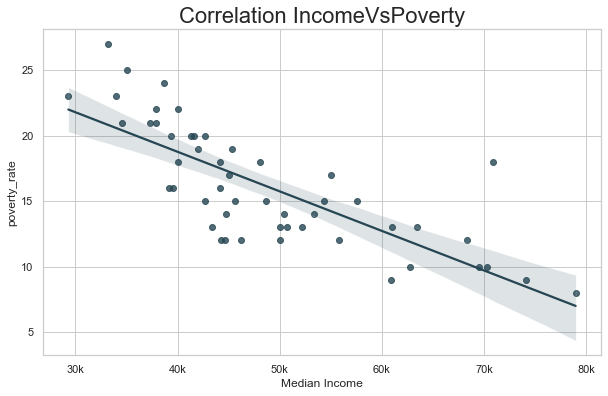

In [45]:
sns.regplot(IncomeVsPoverty['Median Income'],IncomeVsPoverty['poverty_rate'],
            fit_reg=True, color=pal[4])
plt.title('Correlation IncomeVsPoverty',size=22)
plt.xticks([30000,40000,50000,60000,70000,80000],['30k','40k','50k','60k','70k','80k'])
# plt.savefig("./Img/Coorrelation IncomeVsPoverty.png")

# 3.2
### Income vs HS Rate

In [46]:
EducationVsIncome = pd.concat([df_HI, df_HS], axis=1).reset_index()

In [47]:
EducationVsIncome.head()

Geographic Area  Median Income  percent_completed_hs
0              NJ        78958.0                  91.0
1              CT        74099.0                  92.0
2              DC        70848.0                  89.0
3              MA        70307.0                  92.0
4              MD        69530.0                  88.0

In [48]:
EducationVsIncome.corr()

Median Income  percent_completed_hs
Median Income              1.000000              0.626148
percent_completed_hs       0.626148              1.000000

In [49]:
px.scatter(EducationVsIncome, y='Median Income', x='percent_completed_hs',
           hover_data=['Geographic Area'], marginal_x='histogram',
          marginal_y='histogram', title='Reddito Medio Vs Percentuale diplomati',
          color_discrete_sequence=[pal[4]],
          labels={'percent_completed_hs':'Quota diplomati (%)', 'Median Income':'Reddito Medio'}
          )#.write_image("./Img/Coorrelation EducationVsIncome Extended.png")

Text(0.5, 1.0, 'Coorrelation EducationVsIncome')

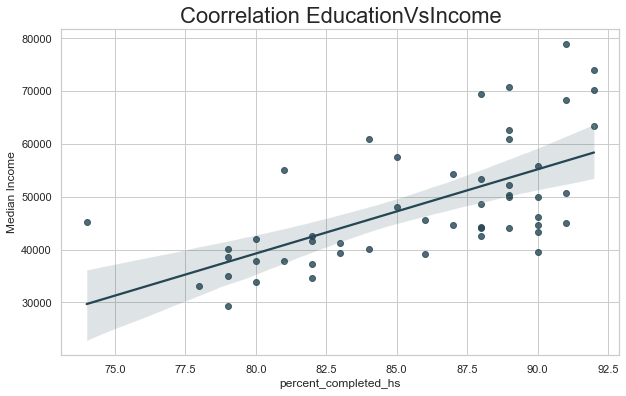

In [50]:
sns.regplot(EducationVsIncome['percent_completed_hs'],EducationVsIncome['Median Income'],
            fit_reg=True, color=pal[4])
plt.title('Coorrelation EducationVsIncome',size=22)
# plt.savefig("./Img/Coorrelation EducationVsIncome.png")

# 3.3
### Poverty vs HS Rate

In [51]:
EducationVsPoverty = pd.concat([df_PL, df_HS], axis=1).reset_index()

In [52]:
EducationVsPoverty.head()

Geographic Area  poverty_rate  percent_completed_hs
0              MS          27.0                  78.0
1              AZ          25.0                  79.0
2              GA          24.0                  79.0
3              AR          23.0                  80.0
4              NM          23.0                  79.0

In [53]:
EducationVsPoverty.corr()

poverty_rate  percent_completed_hs
poverty_rate              1.000000             -0.812221
percent_completed_hs     -0.812221              1.000000

In [54]:
px.scatter(EducationVsPoverty, y='poverty_rate', x='percent_completed_hs',
           hover_data=['Geographic Area'], marginal_x='histogram',
          marginal_y='histogram', title='Reddito Medio Vs Percentuale diplomati',
          color_discrete_sequence=[pal[4]],
          labels={'percent_completed_hs':'Quota diplomati (%)', 'poverty_rate':'Tasso di Povertà'}
          )#.write_image("./Img/Coorrelation EducationVsPoverty Extended.png")

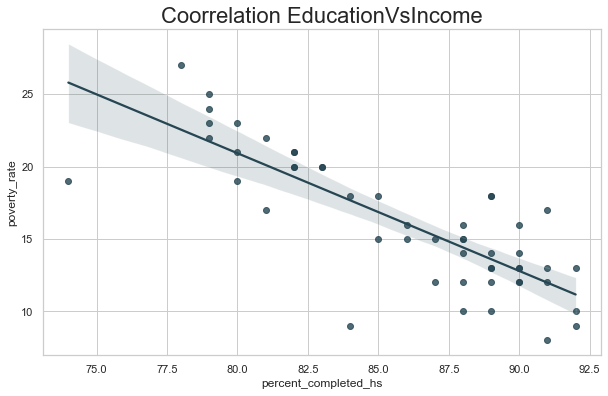

In [55]:
sns.regplot(EducationVsPoverty['percent_completed_hs'],EducationVsPoverty['poverty_rate'],
            fit_reg=True, color=pal[4])
plt.title('Coorrelation EducationVsIncome',size=22)
plt.savefig("./Img/Coorrelation EducationVsPoverty.png")

Prendiamo il dataset delle morti

In [56]:
df = pd.read_csv('./Data/fatal-police-shootings-data.csv')

In [57]:
df.head(5)

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [58]:
# Bar Chart Visualizing Missing values
data_info= pd.DataFrame({'Attributes':df.columns})
data_info['Type']= data_info['Attributes'].apply(lambda x: df[x].dtypes)
data_info['Count_NA']= data_info['Attributes'].apply(lambda x: df[x].isna().sum())
data_info['Percentage_NA']= data_info['Attributes'].apply(lambda x: df[x].isna().mean())
data_info

Attributes     Type  Count_NA  Percentage_NA
0                        id    int64         0       0.000000
1                      name   object       325       0.045897
2                      date   object         0       0.000000
3           manner_of_death   object         0       0.000000
4                     armed   object       208       0.029374
5                       age  float64       384       0.054230
6                    gender   object         5       0.000706
7                      race   object      1157       0.163395
8                      city   object         0       0.000000
9                     state   object         0       0.000000
10  signs_of_mental_illness     bool         0       0.000000
11             threat_level   object         0       0.000000
12                     flee   object       583       0.082333
13              body_camera     bool         0       0.000000
14                longitude  float64       654       0.092360
15                 latitude  float64       654       0.092360
16       is_geocoding_exact     bool         0       0.000000

In [59]:
df.drop(['id'], axis=1, inplace=True)
df.drop(['is_geocoding_exact'], axis=1, inplace=True)

In [60]:
df.duplicated().sum()

0

Elimino la colonna Id in quanto non ha significato ai fini della ricerca, stessa cosa per l'ultima colonna.

Controllo inoltre se vi sono presenti duplicati

In [61]:
# df.dropna(axis='index', thresh=2, inplace=True)

Vediamo se i dati mancanti sono in relazione con uno specifico stato (unico paramentro che non manca mai)

In [62]:
task = df.groupby('state')['race'].value_counts().unstack()
# task.replace(np.nan, 0, inplace=False)

In [63]:
task.idxmax()

race
A    CA
B    CA
H    CA
N    AZ
O    HI
W    CA
dtype: object

In [64]:
task.A.sort_values(
#     by=['N'],
    ascending=False).head(3)

state
CA    35.0
HI    12.0
WA     9.0
Name: A, dtype: float64

In [65]:
df.armed.value_counts().head(10)

gun               4057
knife             1025
unarmed            439
vehicle            246
toy weapon         236
undetermined       229
unknown weapon      98
machete             55
Taser               36
sword               26
Name: armed, dtype: int64

5800
439
229

totale circa 6468

37.0

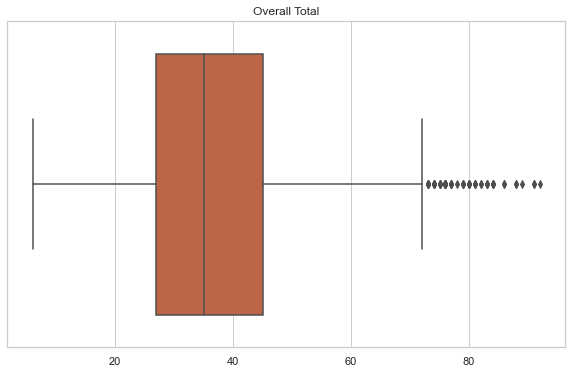

In [66]:
# Grafico per visualizzare l'età

sns.boxplot(data=df, x=df['age'], color='#cf5c36').set_title("Overall Total")

plt.xlabel("")
# plt.savefig("./Img/Overall_Total_v.png", dpi=1200)

df.age.mean().round()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Victims Age Overall')]

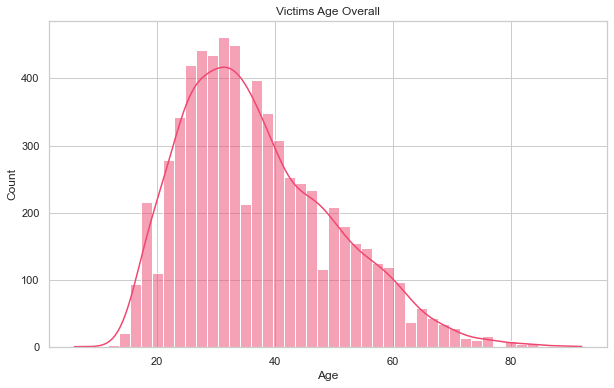

In [67]:
ax = sns.histplot(data=df, x='age', kde=True)
ax.set(xlabel='Age', ylabel='Count', title='Victims Age Overall')
# plt.savefig("Victims Age Overall.png", dpi=1200)

In [68]:
age = list(df.age.fillna(-1))
for i in range(len(age)):
    age[i]=int(age[i])//5

In [69]:
df.insert(4,'age_range', age)

In [70]:
my_dict={-1:np.nan,0:'00-04',1:'05-09',2:'10-14',3:'15-19',4:'20-24',5:'25-29',
         6:'30-35',7:'36-39',8:'40-44',9:'45-49',10:'50-54',11:'55-59',
         12:'60-64',13:'65-69',14:'70-74',15:'75-79',16:'80-84',17:'85-89',18:'90-94',19:'95-99'}

df.age_range.replace(my_dict, inplace=True)

[Text(0.5, 1.0, 'Victims Age Overall')]

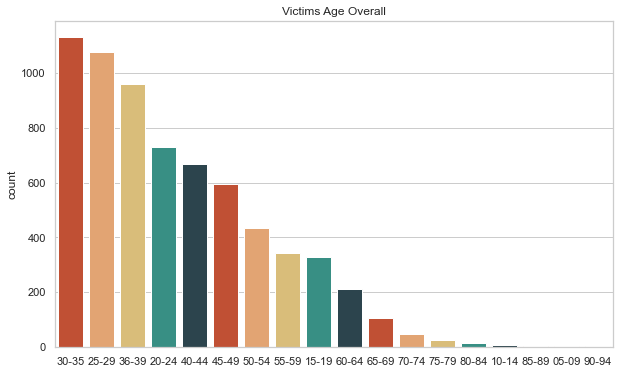

In [71]:
ax = sns.countplot(x='age_range',data=df
                   , order=df.age_range.value_counts().index
                  , palette = pal)

plt.xlabel('')
ax.set(title='Victims Age Overall')

[Text(0.5, 1.0, 'Victims Age Overall')]

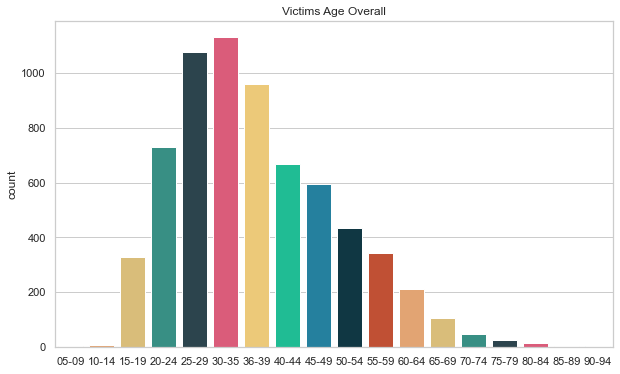

In [72]:
ax = sns.countplot(x='age_range',data=df.sort_values(['age_range']).reset_index(drop=True)
                   , palette = pal + pal_1)

plt.xlabel('')
ax.set(title='Victims Age Overall')
# plt.savefig("./Img/Victims AgeRange Overall.png", dpi=1200)

possiamo trovare nella fascia 30-35 il maggior numero di vittime. complessivamente la maggior parte delle vittime è nel range 25-39

In [73]:
df.groupby('gender')['age_range'].value_counts()

gender  age_range
D       40-44           1
F       30-35          54
        25-29          53
        36-39          41
        45-49          31
        20-24          29
        40-44          28
        50-54          26
        55-59          16
        15-19          12
        60-64           7
        70-74           3
        10-14           2
        65-69           2
        05-09           1
        80-84           1
        90-94           1
M       30-35        1077
        25-29        1024
        36-39         919
        20-24         701
        40-44         639
        45-49         564
        50-54         410
        55-59         326
        15-19         315
        60-64         205
        65-69         105
        70-74          46
        75-79          27
        80-84          16
        10-14           5
        85-89           5
        05-09           2
        90-94           2
Name: age_range, dtype: int64

Non ci sono differenze di genere nella distribuzione delle fasce di età

## Manipolazione della colonna Date
Estraiamo dalla colonna `date` le colonne `Day`, `Month` e `Year`

In [74]:
# Extrapolation Month
m = df['date'].astype(str)
month = np.array([Month[5:7] for Month in m])

#Extrapolation Day
d = df['date'].astype(str)
day = np.array([Day[-2:] for Day in d])

#Extrapolation Year
y = df['date'].astype(str)
year = np.array([Year[:4] for Year in y])

# Create new columns
df.insert(1,'Day', day)
df.insert(2,'Month', month)
df.insert(3,'Year', year)

In [75]:
df.sample(3)

name Day Month  Year        date manner_of_death  \
2955  Jackie Harlan Roberts  06    01  2018  2018-01-06            shot   
5887     Whitney J. Crawley  10    12  2020  2020-12-10            shot   
1571         William Bowers  02    08  2016  2016-08-02            shot   

        armed age_range   age gender race        city state  \
2955      gun     60-64  62.0      M    W  Birmingham    AL   
5887      gun     20-24  23.0      M  NaN        Gary    IN   
1571  unarmed     50-54  51.0      M    W     Castaic    CA   

      signs_of_mental_illness threat_level         flee  body_camera  \
2955                    False       attack  Not fleeing        False   
5887                    False       attack         Foot        False   
1571                    False        other         Foot        False   

      longitude  latitude  
2955    -86.660    33.637  
5887    -87.401    41.600  
1571   -118.618    34.491

In [76]:
df.Year.value_counts()

2021    1055
2020    1021
2019     999
2015     994
2018     990
2017     984
2016     958
2022      80
Name: Year, dtype: int64

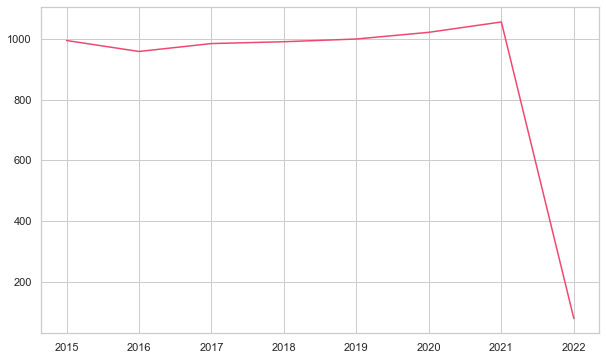

In [77]:
df.Year.value_counts().sort_index(ascending=True).plot()

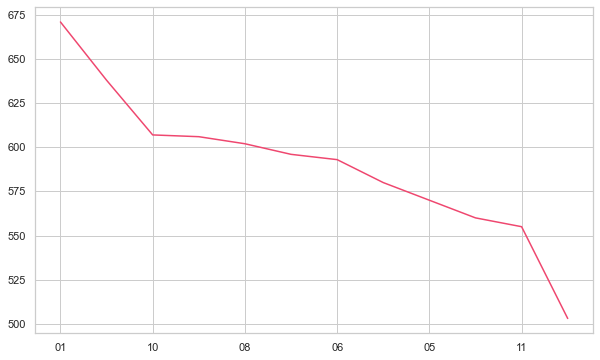

In [78]:
df.Month.value_counts().plot()

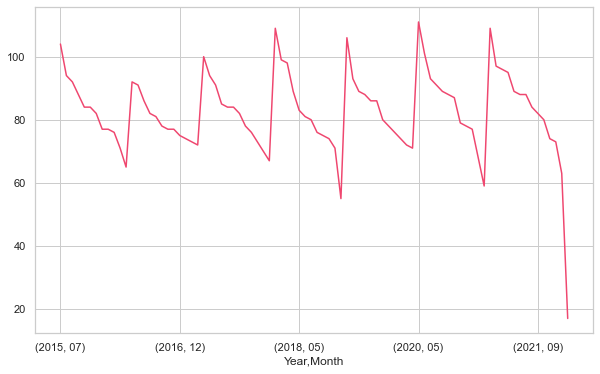

In [79]:
df.groupby('Year')['Month'].value_counts().plot()

# TO DO
## Verificare la presenza di una stagionalità
---

In [80]:
df.Day.value_counts()

05    277
27    252
06    250
16    247
14    246
23    245
09    244
11    244
04    243
10    243
07    242
01    239
17    239
26    229
03    227
19    226
18    225
21    224
22    224
15    223
20    222
24    222
25    222
13    222
28    221
12    218
29    218
08    218
02    201
30    185
31    143
Name: Day, dtype: int64

In [81]:
df.groupby('Year')['Month'].value_counts().unstack()

Month    01     02     03    04     05     06     07    08    09     10    11  \
Year                                                                            
2015   76.0   77.0   92.0  84.0   71.0   65.0  104.0  94.0  82.0   84.0  77.0   
2016   81.0   86.0   92.0  73.0   74.0   91.0   72.0  82.0  77.0   78.0  77.0   
2017   91.0  100.0   76.0  67.0   73.0   84.0   94.0  82.0  70.0   85.0  84.0   
2018   99.0   80.0  109.0  98.0   83.0   81.0   89.0  74.0  55.0   75.0  76.0   
2019   93.0   72.0   88.0  71.0   74.0   86.0   80.0  86.0  78.0   89.0  76.0   
2020   88.0   78.0   93.0  79.0  111.0   77.0   68.0  87.0  59.0  101.0  91.0   
2021   80.0   96.0   88.0  88.0   84.0  109.0   73.0  97.0  82.0   95.0  74.0   
2022   63.0   17.0    NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN   NaN   

Month     12  
Year          
2015    88.0  
2016    75.0  
2017    78.0  
2018    71.0  
2019   106.0  
2020    89.0  
2021    89.0  
2022     NaN

## Mettiamo in relazioni genere e segni di instabilità mentale

In [82]:
df.groupby('gender')['signs_of_mental_illness'].value_counts().unstack()

signs_of_mental_illness   False    True
gender                                 
D                           NaN     1.0
F                         216.0   102.0
M                        5302.0  1455.0

Text(733.7366666666668, 0.5, 'Count')

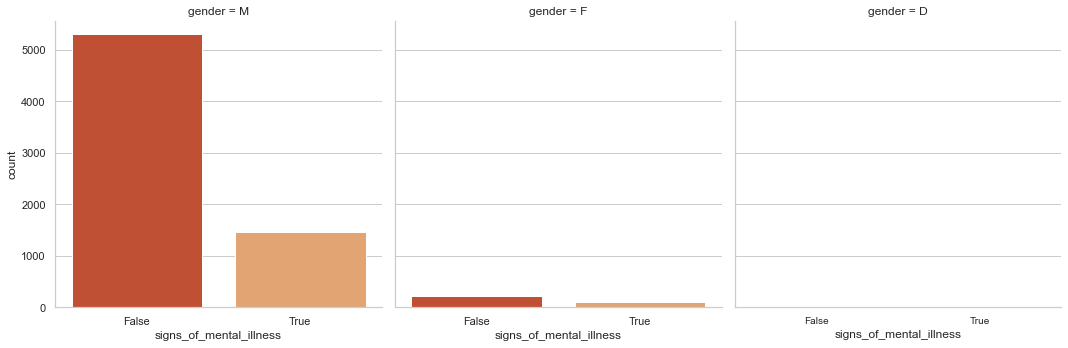

In [83]:
sns.catplot(x='signs_of_mental_illness',
#             hue='race',
            col="gender",
            palette=pal+pal_1,
            kind='count', data=df)
  
plt.xlabel("signs_of_mental_illness")
plt.xticks(rotation=0, fontsize = 10)
plt.ylabel("Count")

# plt.savefig("./Img/Victims Sex-Race.png", dpi=1600)

## Victims' Gender 

In [84]:
df.gender.isna().sum()

5

In [85]:
df.gender.fillna('D', inplace=True)

### Percentuale distribuzione gender nelle vittime

In [86]:
(df.gender.value_counts()/df.gender.value_counts().sum()*100).round(1)

M    95.4
F     4.5
D     0.1
Name: gender, dtype: float64

### Graph

Text(0.5, 1.0, 'Overall Gender Graph')

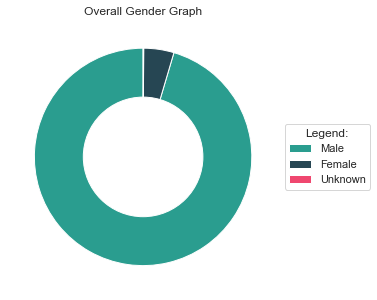

In [87]:
data = df.gender.value_counts()
colors = pal[3:] + pal_1

# Creating plot
fig, ax = plt.subplots(figsize =(10, 5))

# Plot Pie
ax.pie(data, startangle = 90, colors = colors)

# Adding legend
legend = ['Male','Female', 'Unknown']
ax.legend(legend,
          title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add Title
ax.set_title("Overall Gender Graph")

# plt.savefig("./Img/Victims Sex Overall.png", dpi=1600)

### Andamento vittime in base al genere nel tempo

In [88]:
df.groupby('Year')['gender'].value_counts().unstack()

gender    D     F      M
Year                    
2015    NaN  42.0  952.0
2016    NaN  40.0  918.0
2017    1.0  45.0  938.0
2018    NaN  52.0  938.0
2019    NaN  43.0  956.0
2020    NaN  38.0  983.0
2021    3.0  56.0  996.0
2022    2.0   2.0   76.0

## Victims' Race

Text(0.5, 1.0, 'Overall Race Graph')

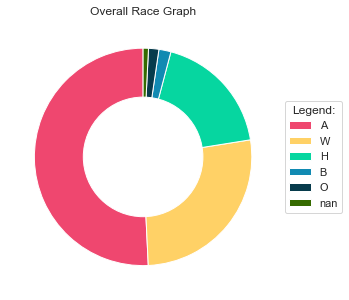

In [89]:
# grafichiamo race
data = df.race.value_counts()
colors = pal_1 + ['#356a00']
# colors = pal[3:] + pal_1

# Creating plot
fig, ax = plt.subplots(figsize =(10, 5))

# Plot Pie
ax.pie(data, startangle = 90, colors = colors)

# Adding legend
legend = df.race.unique()
ax.legend(legend,
          title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add Title
ax.set_title("Overall Race Graph")

# plt.savefig("./Img/Overall Race Graph.png", dpi=1600)

In [90]:
(df.race.value_counts()/df.race.value_counts().sum()*100).round(1)

W    50.8
B    26.8
H    18.4
A     1.8
N     1.5
O     0.8
Name: race, dtype: float64

il divario è netto, primi fra tutti i bianchi e poi a seguire i neri
verificare se rispecchiano la distribuzione della popolazione

In [91]:
n = df.groupby('race')['body_camera'].value_counts().unstack()
norm = n.apply(lambda z:z/z.sum()*100, axis=1).round(2)
norm

body_camera  False   True
race                     
A            80.19  19.81
B            80.63  19.37
H            85.11  14.89
N            82.42  17.58
O            87.23  12.77
W            89.26  10.74

il minor numero di body cam si attesta per le vittime di etnia bianca, mentre il maggiore per l'etnia nera

In [92]:
n = df.groupby('race')['flee'].value_counts().unstack()
norm = n.apply(lambda z:z/z.sum()*100, axis=1).round(2)
norm

flee    Car   Foot  Not fleeing  Other
race                                  
A     10.89   9.90        78.22   0.99
B     16.55  20.84        58.45   4.16
H     17.72  14.96        62.01   5.31
N     12.50  21.25        61.25   5.00
O     21.74  10.87        63.04   4.35
W     17.62  10.43        68.43   3.52

In [93]:
n = df.groupby('race')['signs_of_mental_illness'].value_counts().unstack()
norm = n.apply(lambda z:z/z.sum()*100, axis=1).round(2)
norm

signs_of_mental_illness  False   True
race                                 
A                        74.53  25.47
B                        84.48  15.52
H                        82.54  17.46
N                        82.42  17.58
O                        78.72  21.28
W                        70.90  29.10

In [94]:
n = df.groupby('race')['threat_level'].value_counts().unstack()
norm = n.apply(lambda z:z/z.sum()*100, axis=1).round(2)
norm

threat_level  attack  other  undetermined
race                                     
A              52.83  46.23          0.94
B              66.94  29.78          3.28
H              58.64  38.42          2.94
N              58.24  36.26          5.49
O              65.96  34.04           NaN
W              66.08  31.26          2.66

In [95]:
n = df.groupby('race')['gender'].value_counts().unstack()
norm = n.apply(lambda z:z/z.sum()*100, axis=1).round(2)
norm

gender     D     F      M
race                     
A        NaN  4.72  95.28
B        NaN  3.41  96.59
H        NaN  3.03  96.97
N        NaN  5.49  94.51
O        NaN  6.38  93.62
W       0.03  5.99  93.98

## Victimn's per state

In [96]:
df.state.value_counts().head(10)

CA    1039
TX     628
FL     450
AZ     322
GA     260
CO     256
NC     201
OK     198
OH     196
TN     192
Name: state, dtype: int64

## Signs of mental illness

Text(0.5, 1.0, 'Overall signs of mental illness Graph')

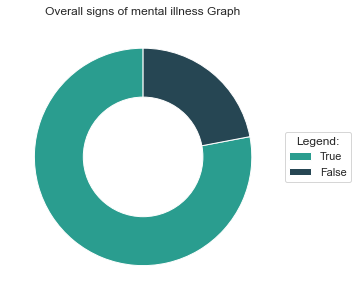

In [97]:
# grafichiamo signs_of_mental_illness
data = df.signs_of_mental_illness.value_counts()
colors = pal[3:]

# Creating plot
fig, ax = plt.subplots(figsize =(10, 5))

# Plot Pie
ax.pie(data, startangle = 90, colors = colors)

# Adding legend
legend = df.signs_of_mental_illness.unique()
ax.legend(legend,
          title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add Title
ax.set_title("Overall signs of mental illness Graph")

# plt.savefig("./Img/Overall signs of mental illness Graph.png", dpi=1600)

In [98]:
(df.signs_of_mental_illness.value_counts()/df.signs_of_mental_illness.value_counts().sum()*100).round(1)

False    78.0
True     22.0
Name: signs_of_mental_illness, dtype: float64

## Flee

Text(0.5, 1.0, 'Overall flee Graph')

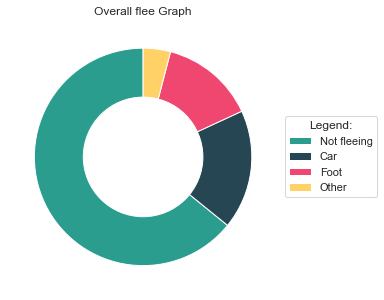

In [99]:
# grafichiamo body_camera
data = df.flee.value_counts()
colors = pal[3:] + pal_1

# Creating plot
fig, ax = plt.subplots(figsize =(10, 5))

# Plot Pie
ax.pie(data, startangle = 90, colors = colors)

# Adding legend
legend = df.flee.unique()
ax.legend(legend,
          title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add Title
ax.set_title("Overall flee Graph")

# plt.savefig("./Img/Victims flee Overall.png", dpi=1600)

In [100]:
(df.flee.value_counts()/df.flee.value_counts().sum()*100).round(1)

Not fleeing    64.2
Car            17.7
Foot           14.0
Other           4.1
Name: flee, dtype: float64

## Threat level

Text(0.5, 1.0, 'Overall threat_level Graph')

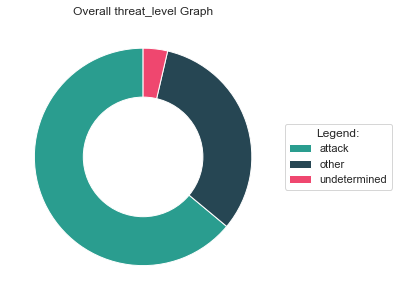

In [101]:
# grafichiamo threat_level
data = df.threat_level.value_counts()
colors = pal[3:] + pal_1

# Creating plot
fig, ax = plt.subplots(figsize =(10, 5))

# Plot Pie
ax.pie(data, startangle = 90, colors = colors)

# Adding legend
legend = df.threat_level.unique()
ax.legend(legend,
          title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add Title
ax.set_title("Overall threat_level Graph")

# plt.savefig("./Img/Overall threat_level Graph.png", dpi=1600)

In [102]:
(df.threat_level.value_counts()/df.threat_level.value_counts().sum()*100).round(1)

attack          64.0
other           32.4
undetermined     3.6
Name: threat_level, dtype: float64

## Body camera

Text(0.5, 1.0, 'Overall body camera Graph')

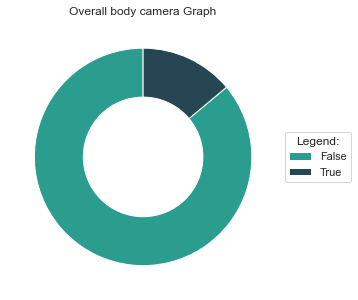

In [103]:
# grafichiamo body_camera
data = df.body_camera.value_counts()
colors = pal[3:]

# Creating plot
fig, ax = plt.subplots(figsize =(10, 5))

# Plot Pie
ax.pie(data, startangle = 90, colors = colors)

# Adding legend
legend = df.body_camera.unique()
ax.legend(legend,
          title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add Title
ax.set_title("Overall body camera Graph")

# plt.savefig("./Img/Overall body camera Graph.png", dpi=1600)

In [104]:
(df.body_camera.value_counts()/df.body_camera.value_counts().sum()*100).round(1)

False    86.1
True     13.9
Name: body_camera, dtype: float64

In [105]:
# replace 'D' in NaN for made some graph
df.gender.replace('D',np.nan,inplace=True)

Text(378.7612500000001, 0.5, 'Count')

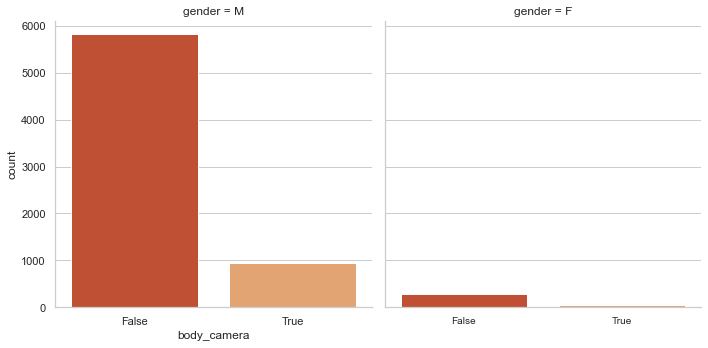

In [106]:
# Grouped Countplot/Barplot
# Count of passengers who survived
# or didn't of each gender
# sns.color_palette("pastel")
sns.catplot(x='body_camera',
#             hue='race',
            col="gender",
            palette=pal+pal_1,
            kind='count', data=df)
  
plt.xlabel("")
plt.xticks(rotation=0, fontsize = 10)
plt.ylabel("Count")

# plt.savefig("./Img/Victims Sex-Race.png", dpi=1600)

In [107]:
n = df.groupby('gender')['body_camera'].value_counts().unstack()
norm = n.apply(lambda z:z/z.sum()*100, axis=1).round(2)
norm

body_camera  False   True
gender                   
F            85.85  14.15
M            86.07  13.93

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

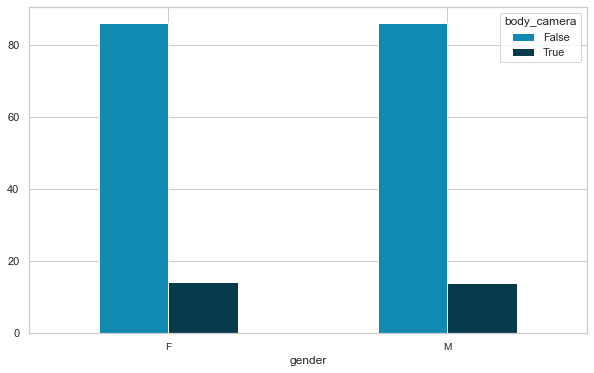

In [108]:
_ = norm.plot.bar(color=pal_1[3:])
plt.xticks(rotation=0, fontsize = 10)

Text(1808.7120833333333, 0.5, 'Count')

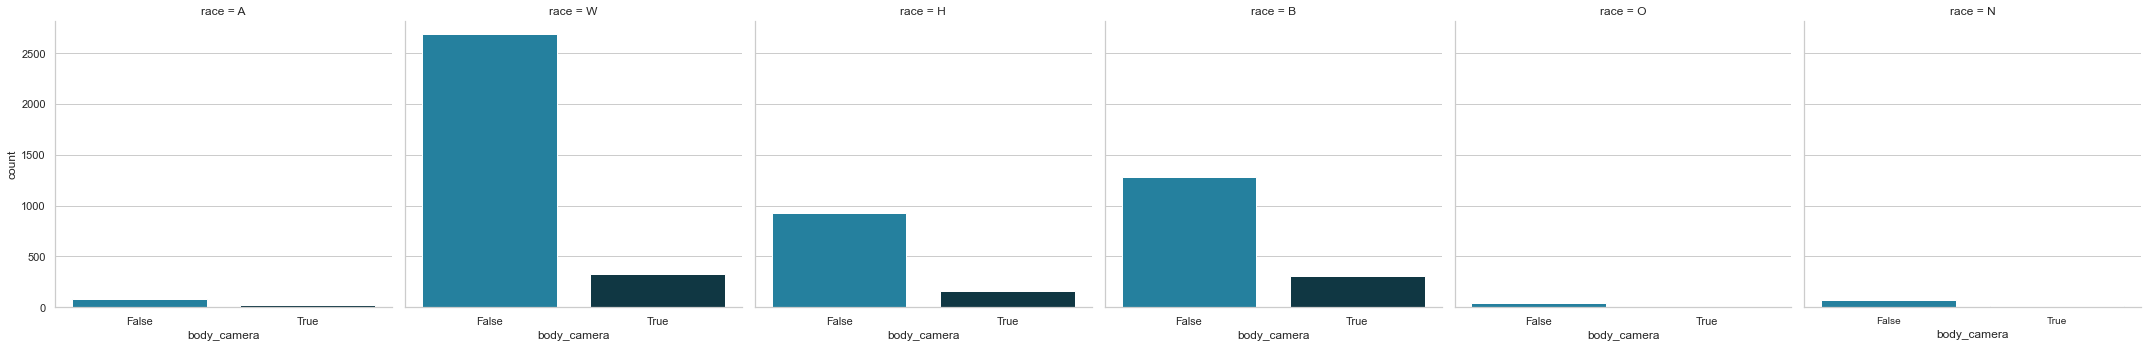

In [109]:
# Grouped Countplot/Barplot
# Count of passengers who survived
# or didn't of each gender
# sns.color_palette("pastel")
sns.catplot(x='body_camera',
#             hue='race',
            col="race",
            palette=pal_1[3:],
            kind='count', data=df)
  
plt.xlabel("body_camera")
plt.xticks(rotation=0, fontsize = 10)
plt.ylabel("Count")

# plt.savefig("./Img/Victims Sex-Race.png", dpi=1600)

In [110]:
n = df.groupby('race')['body_camera'].value_counts().unstack()
norm = n.apply(lambda z:z/z.sum()*100, axis=1).round(2)
norm

body_camera  False   True
race                     
A            80.19  19.81
B            80.63  19.37
H            85.11  14.89
N            82.42  17.58
O            87.23  12.77
W            89.26  10.74

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

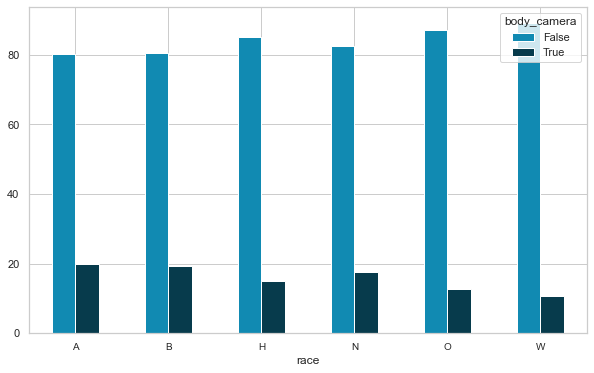

In [111]:
_ = norm.plot.bar(color=pal_1[3:])
plt.xticks(rotation=0, fontsize = 10)

Text(31.231933333333345, 0.5, 'Count')

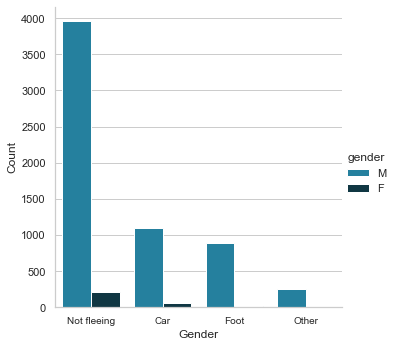

In [112]:
# Grouped Countplot/Barplot
# Count of passengers who survived
# or didn't of each gender
sns.catplot(x='flee',
            hue='gender',
            palette=pal_1[3:],
            kind='count', data=df)
  
plt.xlabel("Gender")
plt.xticks(rotation=0, fontsize = 10)
plt.ylabel("Count")

## Dataset con la popolazione aggiornata al 2020

In [113]:
# from https://www.census.gov/data/tables/2020/dec/2020-apportionment-data.html
pop = pd.read_excel('./Data/PopolationUsa2020.xlsx')
pop

Sigla                 State  Pololation
0     AL               Alabama     5024279
1     AK                Alaska      733391
2     AZ               Arizona     7151502
3     AR              Arkansas     3011524
4     CA            California    39538223
5     CO              Colorado     5773714
6     CT           Connecticut     3605944
7     DE              Delaware      989948
8     DC  District of Columbia      689545
9     FL               Florida    21538187
10    GA               Georgia    10711908
11    HI                Hawaii     1455271
12    ID                 Idaho     1839106
13    IL              Illinois    12812508
14    IN               Indiana     6785528
15    IA                  Iowa     3190369
16    KS                Kansas     2937880
17    KY              Kentucky     4505836
18    LA             Louisiana     4657757
19    ME                 Maine     1362359
20    MD              Maryland     6177224
21    MA         Massachusetts     7029917
22    MI              Michigan    10077331
23    MN             Minnesota     5706494
24    MS           Mississippi     2961279
25    MO              Missouri     6154913
26    MT               Montana     1084225
27    NE              Nebraska     1961504
28    NV                Nevada     3104614
29    NH         New Hampshire     1377529
30    NJ            New Jersey     9288994
31    NM            New Mexico     2117522
32    NY              New York    20201249
33    NC        North Carolina    10439388
34    ND          North Dakota      779094
35    OH                  Ohio    11799448
36    OK              Oklahoma     3959353
37    OR                Oregon     4237256
38    PA          Pennsylvania    13002700
39    RI          Rhode Island     1097379
40    SC        South Carolina     5118425
41    SD          South Dakota      886667
42    TN             Tennessee     6910840
43    TX                 Texas    29145505
44    UT                  Utah     3271616
45    VT               Vermont      643077
46    VA              Virginia     8631393
47    WA            Washington     7705281
48    WV         West Virginia     1793716
49    WI             Wisconsin     5893718
50    WY               Wyoming      576851

In [114]:
pop.sort_values('Pololation').head(3)

Sigla                 State  Pololation
50    WY               Wyoming      576851
45    VT               Vermont      643077
8     DC  District of Columbia      689545

In [115]:
pop.sort_values('Pololation').tail(3)

Sigla       State  Pololation
9     FL     Florida    21538187
43    TX       Texas    29145505
4     CA  California    39538223

In [116]:
df.head(1)

name Day Month  Year        date manner_of_death armed age_range  \
0  Tim Elliot  02    01  2015  2015-01-02            shot   gun     50-54   

    age gender race     city state  signs_of_mental_illness threat_level  \
0  53.0      M    A  Shelton    WA                     True       attack   

          flee  body_camera  longitude  latitude  
0  Not fleeing        False   -123.122    47.247

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

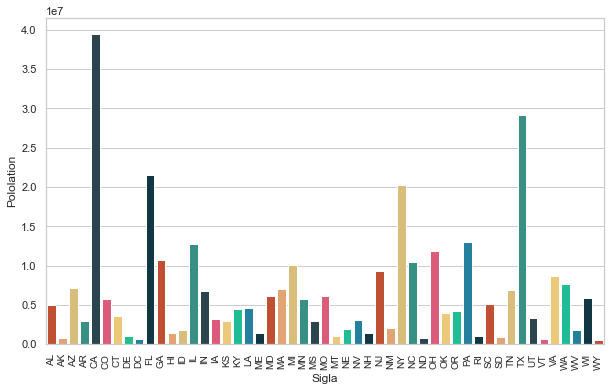

In [117]:
sns.barplot(y=pop['Pololation'], x=pop['Sigla'], data=pop, palette=pal+pal_1)
plt.xticks(rotation=90, fontsize = 10)

## Città in base al numero di vittime

In [118]:
df.city.value_counts().head(3)

Los Angeles    113
Phoenix         98
Houston         77
Name: city, dtype: int64

In [119]:
df.city.value_counts().tail(3)

Hunters              1
McLoud               1
Georgetown County    1
Name: city, dtype: int64

## Stati in base al numero di vittime

In [120]:
df.state.value_counts().index

Index(['CA', 'TX', 'FL', 'AZ', 'GA', 'CO', 'NC', 'OK', 'OH', 'TN', 'WA', 'MO',
       'LA', 'PA', 'NM', 'IL', 'IN', 'NY', 'AL', 'KY', 'VA', 'NV', 'MI', 'OR',
       'WI', 'SC', 'MD', 'AR', 'MS', 'UT', 'NJ', 'MN', 'KS', 'WV', 'ID', 'MA',
       'AK', 'IA', 'MT', 'HI', 'NE', 'ME', 'CT', 'SD', 'DC', 'WY', 'NH', 'DE',
       'ND', 'VT', 'RI'],
      dtype='object')

In [121]:
list(df.state.value_counts())

[1039,
 628,
 450,
 322,
 260,
 256,
 201,
 198,
 196,
 192,
 188,
 186,
 145,
 145,
 144,
 143,
 135,
 131,
 131,
 130,
 123,
 118,
 117,
 111,
 111,
 111,
 101,
 98,
 93,
 84,
 83,
 80,
 66,
 65,
 60,
 51,
 49,
 45,
 44,
 37,
 36,
 29,
 23,
 21,
 21,
 19,
 18,
 16,
 15,
 11,
 5]

In [122]:
research = df.groupby('state')['race'].value_counts().unstack().fillna(0)
research.head(1)

# totale vittime in CA : 1039
# CA	35.0	160.0	382.0	4.0	8.0	259.0
# CA share_white	share_black	share_native_american	share_asian	share_hispanic
# CA	71.535982	2.679645	1.715167	5.542613	29.513592

race     A    B    H     N    O     W
state                                
AK     2.0  3.0  0.0  10.0  0.0  28.0

In [123]:
da = pd.DataFrame(columns=[])
da.insert(0, "State", df.state.value_counts().index)
da.insert(1, "Number_Victimns", list(df.state.value_counts()))
da = da.sort_values(by=['State'], ascending=True)
da.head(1)

State  Number_Victimns
36    AK               49

In [124]:
research = df.groupby('state')['race'].value_counts().unstack().fillna(0)

da = pd.DataFrame(columns=[])
da.insert(0, "State", df.state.value_counts().index)
da.insert(1, "Number_Victimns", list(df.state.value_counts()))
da = da.sort_values(by=['State'], ascending=True)

da.insert(2, "A_Victimns", list(research['A']))
da.insert(3, "%A_Victimns", (da['A_Victimns']/da['Number_Victimns']*100).round(2))
da.insert(4, "%Asian_American", list(raw_R['share_asian'].round(2)))

da.insert(5, "B_Victimns", list(research['B']))
da.insert(6, "%B_Victimns", (da['B_Victimns']/da['Number_Victimns']*100).round(2))
da.insert(7, "%Black_American", list(raw_R['share_black'].round(2)))

da.insert(8, "H_Victimns", list(research['H']))
da.insert(9, "%H_Victimns", (da['H_Victimns']/da['Number_Victimns']*100).round(2))
da.insert(10, "%Hispanic_American", list(raw_R['share_hispanic'].round(2)))

da.insert(11, "N_Victimns", list(research['N']))
da.insert(12, "%N_Victimns", (da['N_Victimns']/da['Number_Victimns']*100).round(2))
da.insert(13, "%Native_American", list(raw_R['share_native_american'].round(2)))

# da.insert(14, "O_Victimns", list(research['O']))
# da.insert(15, "%O_Victimns", (da['O_Victimns']/da['Number_Victimns']*100).round(2))
# da.insert(16, "%Native_American", list(raw_R['share_native_american'].round(2)))

da.insert(14, "W_Victimns", list(research['W']))
da.insert(15, "%W_Victimns", (da['W_Victimns']/da['Number_Victimns']*100).round(2))
da.insert(16, "%White_American", list(raw_R['share_white'].round(2)))


# share_white	share_black	share_native_american	share_asian	share_hispanic

da = da.reset_index()
da

index State  Number_Victimns  A_Victimns  %A_Victimns  %Asian_American  \
0      36    AK               49         2.0         4.08             1.38   
1      18    AL              131         0.0         0.00             0.48   
2      27    AR               98         2.0         2.04             0.48   
3       3    AZ              322         0.0         0.00             0.73   
4       0    CA             1039        35.0         3.37             5.54   
5       5    CO              256         5.0         1.95             1.15   
6      42    CT               23         0.0         0.00             2.99   
7      44    DC               21         0.0         0.00             3.50   
8      47    DE               16         0.0         0.00             2.00   
9       2    FL              450         1.0         0.22             1.62   
10      4    GA              260         3.0         1.15             1.49   
11     39    HI               37        12.0        32.43            25.65   
12     37    IA               45         0.0         0.00             0.40   
13     34    ID               60         1.0         1.67             0.49   
14     15    IL              143         0.0         0.00             1.34   
15     16    IN              135         0.0         0.00             0.59   
16     32    KS               66         0.0         0.00             0.43   
17     19    KY              130         1.0         0.77             0.71   
18     12    LA              145         2.0         1.38             0.79   
19     35    MA               51         0.0         0.00             2.84   
20     26    MD              101         1.0         0.99             2.98   
21     41    ME               29         0.0         0.00             1.03   
22     22    MI              117         1.0         0.85             0.95   
23     31    MN               80         3.0         3.75             1.03   
24     11    MO              186         1.0         0.54             0.55   
25     28    MS               93         1.0         1.08             0.55   
26     38    MT               44         0.0         0.00             0.32   
27      6    NC              201         1.0         0.50             0.93   
28     48    ND               15         0.0         0.00             0.29   
29     40    NE               36         0.0         0.00             0.29   
30     46    NH               18         0.0         0.00             1.34   
31     30    NJ               83         1.0         1.20             5.94   
32     14    NM              144         0.0         0.00             0.49   
33     21    NV              118         3.0         2.54             2.01   
34     17    NY              131         1.0         0.76             2.72   
35      8    OH              196         2.0         1.02             0.75   
36      7    OK              198         3.0         1.52             0.43   
37     23    OR              111         0.0         0.00             1.38   
38     13    PA              145         1.0         0.69             0.99   
39     50    RI                5         0.0         0.00             1.69   
40     25    SC              111         1.0         0.90             0.74   
41     43    SD               21         1.0         4.76             0.32   
42      9    TN              192         1.0         0.52             0.64   
43      1    TX              628         6.0         0.96             1.01   
44     29    UT               84         1.0         1.19             0.77   
45     20    VA              123         1.0         0.81             3.67   
46     49    VT               11         0.0         0.00             0.91   
47     10    WA              188         9.0         4.79             3.07   
48     24    WI              111         2.0         1.80             0.79   
49     33    WV               65         1.0         1.54             0.34   
50     45    WY           

In [125]:
da.iloc[da['%A_Victimns'].idxmax()]

index                    39
State                    HI
Number_Victimns          37
A_Victimns             12.0
%A_Victimns           32.43
%Asian_American       25.65
B_Victimns              2.0
%B_Victimns            5.41
%Black_American        1.07
H_Victimns              1.0
%H_Victimns             2.7
%Hispanic_American    10.36
N_Victimns              0.0
%N_Victimns             0.0
%Native_American       0.39
W_Victimns              3.0
%W_Victimns            8.11
%White_American       33.37
Name: 11, dtype: object

In [126]:
da.iloc[da['%B_Victimns'].idxmax()]

index                    44
State                    DC
Number_Victimns          21
A_Victimns              0.0
%A_Victimns             0.0
%Asian_American         3.5
B_Victimns             16.0
%B_Victimns           76.19
%Black_American        50.7
H_Victimns              0.0
%H_Victimns             0.0
%Hispanic_American      9.1
N_Victimns              0.0
%N_Victimns             0.0
%Native_American        0.3
W_Victimns              2.0
%W_Victimns            9.52
%White_American        38.5
Name: 7, dtype: object

In [127]:
da.iloc[da['%H_Victimns'].idxmax()]

index                    14
State                    NM
Number_Victimns         144
A_Victimns              0.0
%A_Victimns             0.0
%Asian_American        0.49
B_Victimns              2.0
%B_Victimns            1.39
%Black_American        0.67
H_Victimns             78.0
%H_Victimns           54.17
%Hispanic_American    45.43
N_Victimns              2.0
%N_Victimns            1.39
%Native_American      15.34
W_Victimns             28.0
%W_Victimns           19.44
%White_American       65.42
Name: 32, dtype: object

In [128]:
da.iloc[da['%N_Victimns'].idxmax()]

index                    48
State                    ND
Number_Victimns          15
A_Victimns              0.0
%A_Victimns             0.0
%Asian_American        0.29
B_Victimns              0.0
%B_Victimns             0.0
%Black_American        0.36
H_Victimns              0.0
%H_Victimns             0.0
%Hispanic_American     1.82
N_Victimns              7.0
%N_Victimns           46.67
%Native_American       5.33
W_Victimns              6.0
%W_Victimns            40.0
%White_American       92.29
Name: 28, dtype: object

In [129]:
da.iloc[da['%W_Victimns'].idxmax()]

index                    46
State                    NH
Number_Victimns          18
A_Victimns              0.0
%A_Victimns             0.0
%Asian_American        1.34
B_Victimns              0.0
%B_Victimns             0.0
%Black_American        0.72
H_Victimns              0.0
%H_Victimns             0.0
%Hispanic_American     1.74
N_Victimns              0.0
%N_Victimns             0.0
%Native_American       0.29
W_Victimns             16.0
%W_Victimns           88.89
%White_American       95.68
Name: 30, dtype: object

In [130]:
df.state.value_counts().head(3)

CA    1039
TX     628
FL     450
Name: state, dtype: int64

In [131]:
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# import time

# PATH = "C:/Program Files (x86)/chromedriver.exe"
# driver = webdriver.Chrome(PATH)

# def web_scraper():
#     #print(driver.title)
#     place = ['Los Angeles', 'Phoenix','Houston']
#     my_list = []

#     for _ in place:
#         driver.get("https://www.latlong.net/")
#         search = driver.find_element_by_id("place")
#         search.send_keys(f"{_}")
#         search.send_keys(Keys.RETURN)

#         lat = driver.find_element_by_name("lat").get_property('value')
#         print(lat)
#         lng = driver.find_element_by_id("lng").get_property('value')
#         print(lng)


#         time.sleep(2)

#         my_list += ['{},{},{}'.format(_, lat, lng)]

#     time.sleep(5)

    
#     print(my_list)

#     driver.quit()

# # web_scraper()

Los Angeles,34.052235,-118.243683, Phoenix,33.448376,-112.074036, Houston,29.749907,-95.358421

In [132]:
df.signs_of_mental_illness.unique()

array([ True, False])

In [133]:
df.columns

Index(['name', 'Day', 'Month', 'Year', 'date', 'manner_of_death', 'armed',
       'age_range', 'age', 'gender', 'race', 'city', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera',
       'longitude', 'latitude'],
      dtype='object')

In [134]:
## Rappresentazione sulla mappa in base ai segni di mental illness
mask = df['signs_of_mental_illness'] == True
df[mask]

name Day Month  Year        date  \
0                         Tim Elliot  02    01  2015  2015-01-02   
3                    Matthew Hoffman  04    01  2015  2015-01-04   
12    Hashim Hanif Ibn Abdul-Rasheed  07    01  2015  2015-01-07   
21                       Tommy Smith  11    01  2015  2015-01-11   
25                 Richard McClendon  13    01  2015  2015-01-13   
...                              ...  ..   ...   ...         ...   
7049                   Peterson Kamo  24    01  2022  2022-01-24   
7051                      Derek Rock  25    01  2022  2022-01-25   
7052                       John Hunt  25    01  2022  2022-01-25   
7057                   Landon Eastep  28    01  2022  2022-01-28   
7067                    Phillip Dill  04    02  2022  2022-02-04   

     manner_of_death        armed age_range   age gender race           city  \
0               shot          gun     50-54  53.0      M    A        Shelton   
3               shot   toy weapon     30-35  32.0      M    W  San Francisco   
12              shot        knife     40-44  41.0      M    B       Columbus   
21              shot          gun     36-39  39.0      M    W         Arcola   
25              shot        knife     40-44  43.0      M    W     Jourdanton   
...              ...          ...       ...   ...    ...  ...            ...   
7049            shot        knife       NaN   NaN      M  NaN        Spokane   
7051            shot          gun     30-35  30.0      M  NaN         Aragon   
7052            shot  gun and car     20-24  20.0      M  NaN        Memphis   
7057            shot   box cutter     36-39  37.0      M  NaN      Nashville   
7067            shot        knife     30-35  34.0      M  NaN     Evansville   

     state  signs_of_mental_illness  threat_level         flee  body_camera  \
0       WA                     True        attack  Not fleeing        False   
3       CA                     True        attack  Not fleeing        False   
12      OH                     True         other  Not fleeing        False   
21      IL                     True        attack  Not fleeing        False   
25      TX                     True         other  Not fleeing        False   
...    ...                      ...           ...          ...          ...   
7049    WA                     True  undetermined  Not fleeing        False   
7051    GA                     True  undetermined  Not fleeing        False   
7052    TN                     True  undetermined          Car        False   
7057    TN                     True  undetermined  Not fleeing         True   
7067    IN                     True        attack  Not fleeing         True   

      longitude  latitude  
0      -123.122    47.247  
3      -122.422    37.763  
12      -82.885    39.999  
21      -88.304    39.692  
25      -98.542    28.912  
...         ...       ...  
7049        NaN       NaN  
7051        NaN       NaN  
7052        NaN       NaN  
7057        NaN       NaN  
7067        NaN       NaN  

[1559 rows x 19 columns]

In [135]:
df.groupby('city')['signs_of_mental_illness'].value_counts().unstack()

signs_of_mental_illness       False  True
city                                     
300 block of State Line Road    1.0   NaN
Abbeville                       2.0   1.0
Aberdeen                        2.0   NaN
Abilene                         2.0   1.0
Abingdon                        2.0   NaN
...                             ...   ...
Yucca Valley                    3.0   NaN
Yulee                           2.0   1.0
Yuma                            4.0   NaN
Zanesville                      NaN   1.0
Zion                            1.0   1.0

[2969 rows x 2 columns]

Città con maggiori `signs_of_mental_illness` fra le vittime

In [136]:
df.groupby('city')['signs_of_mental_illness'].value_counts().unstack()[1].idxmax()

'Las Vegas'

location Las Vegas = 36.114647,-115.172813

## Mettiamo tutte le città rilevanti in una mappa

In [137]:
m = folium.Map(location=[40, -95], zoom_start=3.5)

my_list = [['Los Angeles',34.052235,-118.243683],['Phoenix',33.448376,-112.074036],['Houston',29.749907,-95.358421]]

for i in my_list:
    folium.Marker(
        location=[i[1],i[2]],
        popup=i[0],
        icon=folium.Icon(color="red", icon="Waypoint"),
    ).add_to(m)


my_list = [['Los Angeles',34.052235,-118.243683],['Phoenix',33.448376,-112.074036],['Houston',29.749907,-95.358421]]

for i in my_list:
    folium.Marker(
        location=[i[1],i[2]],
        popup=i[0],
        icon=folium.Icon(color="red", icon="Waypoint"),
    ).add_to(m)

# Top City for  signs_of_mental_illness
folium.Marker(
        location=[36.114647,-115.172813],
        popup='Las Vegas',
        icon=folium.Icon(color="blue", icon="Waypoint"),
    ).add_to(m)

m.save("a.html")
m

In [138]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=pop,
    columns=["Sigla", "Pololation"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Popolation Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [139]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=da,
    columns=["State","Number_Victimns"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Number Victimns",
).add_to(m)

folium.LayerControl().add_to(m)

# m.save("b.html")

m

In [140]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=da,
    columns=["State","Number_Victimns"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Number Victimns",
).add_to(m)

folium.LayerControl().add_to(m)

# m.save("c.html")

m

In [141]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="Victimns Rate (%)",
    data=da,
    columns=["State", "Number_Victimns"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Victimns Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

my_list = [['Los Angeles',34.052235,-118.243683],['Phoenix',33.448376,-112.074036],['Houston',29.749907,-95.358421]]

for i in my_list:
    folium.Marker(
        location=[i[1],i[2]],
        popup=i[0],
        icon=folium.Icon(color="red", icon="Waypoint"),
    ).add_to(m)

# Top City for  signs_of_mental_illness
folium.Marker(
        location=[36.114647,-115.172813],
        popup='Las Vegas',
        icon=folium.Icon(color="blue", icon="Waypoint"),
    ).add_to(m)

m